# Apriori in Python

Apriori algorithm works on the principle of Association Rule Mining. Association rule mining is a technique to identify underlying relations between different items. This relationship can be a similarity between items on how frequently they are bought or how similar users bought it.

In this labsheet, we will be looking on how the Apriori algorithm works with a python example.

## Market Based Analysis

It is one of the key techniques used by large retailers to uncover associations between items. They try to find out associations between different items and products that can be sold together, which gives assisting in right product placement. Typically, it figures out what products are being bought together and organizations can place products in a similar manner. Let’s understand this better with an example:

People who buy Bread usually buy Butter too. The Marketing teams at retail stores should target customers who buy bread and butter and provide an offer to them so that they buy the third item, like eggs. So if customers buy bread and butter and see a discount or an offer on eggs, they will be encouraged to spend more and buy the eggs. This is what market basket analysis is all about. This is just a small example. So, if you take 10000 items data of your Supermart to a Data Scientist, Just imagine the number of insights you can get. And that is why Association Rule mining is so important.


## Apriori Algorithm

Association rules can be thought of as an IF-THEN relationship. Suppose item A is being bought by the customer, then the chances of item B being picked by the customer too under the same Transaction ID is found out.

There are three major components of the Apriori algorithm:
1. Support
2. Confidence
3. Lift

We will explain this concept with the help of an example.

Suppose we have a record of 1000 customers transactions and we want to find out support, confidence and lift for milk and diapers. out of 1000 transactions, 120 contains a milk and 150 contains a diaper. out of this 150 transaction where a diaper is purchased 30 contains transaction contains milk as well. we will use this data to calculate support, confidence and lift.

### Support

Support refers to the popularity of item and can be calculated by finding the number of transactions containing a particular item divided by the total number of transactions.

**Support(diaper) = (Transactions containing (diaper))/(Total Transactions)**

### Confidence

Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by the total number of transactions where A is bought. Mathematically, it can be represented as:

**Confidence(A → B) = (Transactions containing both (A and B))/(Transactions containing A)**

### Lift

Lift refers to the increase in the ratio of the sale of B when A is sold.

**Lift(A→B) = (Confidence (A→B))/(Support (B))**


Association rule by Lift

lift = 1 → There is no association between A and B.

lift < 1 → A and B are unlikely to be bought together.

lift > 1 → greater the lift greater is the likelihood of buying both products together.

## Important

To run this file make sure you have installed mlextend library in anaconda environment.
To install it, run command in your anaconda prompt:

       conda install -c conda-forge mlxtend 

# Importing Libraries and Preparing Datasets

In [1]:
#importing Libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Preparing the dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
            
            
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False

## Generating Frequent Itemsets and Rules

In [3]:
# Generating frequent Itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Kidney Beans, Eggs, Onion)

In [4]:
# Generating Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=.8)
rules

antecedents           consequents  antecedent support  \
0                 (Eggs)        (Kidney Beans)                 0.8   
1         (Kidney Beans)                (Eggs)                 1.0   
2                (Onion)                (Eggs)                 0.6   
3                 (Milk)        (Kidney Beans)                 0.6   
4                (Onion)        (Kidney Beans)                 0.6   
5               (Yogurt)        (Kidney Beans)                 0.6   
6  (Onion, Kidney Beans)                (Eggs)                 0.6   
7          (Eggs, Onion)        (Kidney Beans)                 0.6   
8                (Onion)  (Eggs, Kidney Beans)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  
0                 1.0      0.8         1.0  1.00      0.00         inf  
1                 0.8      0.8         0.8  1.00      0.00    1.000000  
2                 0.8      0.6         1.0  1.25      0.12         inf  
3                 1.0      0.6         1.0  1.00      0.00         inf  
4                 1.0      0.6         1.0  1.00      0.00         inf  
5                 1.0      0.6         1.0  1.00      0.00         inf  
6                 0.8      0.6         1.0  1.25      0.12         inf  
7                 1.0      0.6         1.0  1.00      0.00         inf  
8                 0.8      0.6         1.0  1.25      0.12         inf

## Plotting the rules

In [5]:
# Function to Plot graph for rules
def draw_graph(rules):
    rules_to_show = len(rules)
    G1 = nx.DiGraph()

    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   


    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])


        for a in rules.iloc[i]['antecedents']:

            G1.add_nodes_from([a])

            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:

                G1.add_nodes_from([c])

                G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       



    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

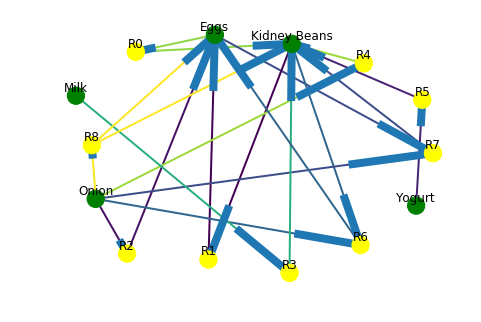

In [6]:
draw_graph (rules)